In [1]:
import pandas as pd
import numpy as np


from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

/Users/davsu428/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc9 in position 2528: invalid continuation byte

In [18]:
100*365*24*60*60*1000000

3153600000000000

In [20]:
34*365*12000*5*8

5956800000

In [3]:
df=pd.read_csv('FunctionalThinking.csv',delimiter=';', encoding = "ISO-8859-1")

df.head()

,Author,Title,Definition
0,"Moss, Boyce & Lamberg (2020)",Representations and conceptions of variables i...,Representational thinking that focuses on the ...
1,"Pang & Sunwoo, (2022)",Design of a pattern and correspondence unit to...,Generalizing relationships between covarying q...
2,Panorkou & Maloney (2016),Early algebra: Expressing covariation and corr...,Identify relationships in and between two patt...
3,"Stephens, Blanton, Knuth, Isler & Gardiner (2015)",Just say yes to early algebra!,Involves reasoning about and expressing how tw...
4,"Warren, & Cooper (2006)",Using repeating patterns to explore functional...,It is a matter of relation and transformation ...


In [17]:

definition=list(df['Definition'])
for e in df.interrows():
    embedding = model.encode(e['Definition'], batch_size=64, show_progress_bar=True, convert_to_tensor=True)
    embeddings.append(embedding)

print(embeddings)
df['Embedding'] = embeddings

AttributeError: 'DataFrame' object has no attribute 'interrows'

['Moss, Boyc...', 'Pang & Sun...', 'Panorkou &...', 'Stephens, ...', 'Warren, & ...', 'Warren, Co...', 'Warren, Mi...', 'Blanton, S...', 'Chimoni, P...', 'Muir, Brag...', 'Warren, Co...', 'Pinto, Ca\x96...', 'Pitta-Pant...', 'Somasundra...', 'Sproesser,...', 'Stephens, ...', 'Wilkie (2014)', 'Wilkie, & ...', 'Wilkie, & ...', 'Xolocotzin...']


/var/folders/43/x1yzc1zx4tg_xsjv8v7v6lm40000gq/T/ipykernel_40993/2883111285.py:39: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.tight_layout()
/var/folders/43/x1yzc1zx4tg_xsjv8v7v6lm40000gq/T/ipykernel_40993/2883111285.py:39: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.tight_layout()
/Users/davsu428/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/davsu428/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


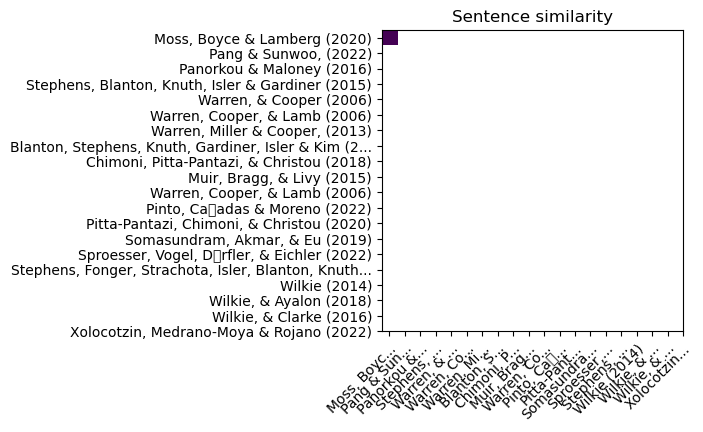

In [11]:
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
#Compute cosine similarity between all pairs

cos_sim = util.cos_sim(embeddings, embeddings)


fig, ax = plt.subplots()
im = ax.imshow(cos_sim)

said=list(df['Author'])

def shorten(item,n):
    if len(item)>n+3:
        return item[0:n] + '...' 
    else:
        return item

said_short=[]
for item in said:
    said_short.append(shorten(item,10))
said_medium=[]
for item in said:
    said_medium.append(shorten(item,50))

print(said_short)
    
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(said_short)), labels=said_short)
ax.set_yticks(np.arange(len(said_medium)), labels=said_medium)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Sentence similarity")
fig.tight_layout()
plt.show()


In [13]:
embeddings

0     0.071195
1     0.048278
2    -0.037951
3     0.048133
4     0.018031
5     0.018031
6     0.080076
7     0.056104
8    -0.045844
9    -0.017809
10    0.078259
11    0.082419
12    0.033038
13   -0.013393
14    0.054526
15    0.009805
16    0.063632
17    0.071195
18    0.071195
19   -0.029203
Name: Embedding, dtype: float32

In [18]:
import pickle
#pickle.load('data/Episode_0_E.pkl')

pickle.load( open( "data/Episode_%d.p"% i, "rb" ) )

ValueError: Wrong number of items passed 384, placement implies 1

In [119]:
"""
This is a more complex example on performing clustering on large scale dataset.
This examples find in a large set of sentences local communities, i.e., groups of sentences that are highly
similar. You can freely configure the threshold what is considered as similar. A high threshold will
only find extremely similar sentences, a lower threshold will find more sentence that are less similar.
A second parameter is 'min_community_size': Only communities with at least a certain number of sentences will be returned.
The method for finding the communities is extremely fast, for clustering 50k sentences it requires only 5 seconds (plus embedding comuptation).
In this example, we download a large set of questions from Quora and then find similar questions in this set.
"""
from sentence_transformers import SentenceTransformer, util

character = list(df['Person'])
corpus_sentences = said
corpus_embeddings =  embeddings



#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(corpus_embeddings, min_community_size=20, threshold=0.04)
print(len(clusters))
#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("%s : %s" % (character[sentence_id],corpus_sentences[sentence_id]))
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("%s : %s"% (character[sentence_id],corpus_sentences[sentence_id]))


1

Cluster 1, #389 Elements 
Ross : Hey everybody!
Ross : Happy Thanksgiving!
Chandler : No, no, no.
	 ...
Ross : I know.
Chandler : Yeah.
Chandler : End


In [95]:
embeddings

array([[-0.06292001,  0.02220031,  0.07742068, ...,  0.04880926,
         0.0736526 ,  0.01871135],
       [ 0.00682118, -0.04483594,  0.0537557 , ...,  0.11062304,
         0.07228915,  0.05540337],
       [-0.01032703,  0.04325484, -0.00132912, ..., -0.05859902,
         0.04964947, -0.02987811],
       ...,
       [ 0.01981522,  0.07520658, -0.02055376, ..., -0.0572909 ,
         0.03910507, -0.0380261 ],
       [-0.14641151,  0.00565292, -0.00910747, ...,  0.03091162,
         0.09168582, -0.03410269],
       [-0.03510161,  0.00205916, -0.01478848, ..., -0.03965149,
         0.01622299,  0.03367841]], dtype=float32)